In [8]:
example_experiments = {
    'ml1m': {
        'CF': "BaseOnlineAgent_PointwiseRanker_actor0.0003_niter5000_reg0.0001_ep0.05_bs128_epbs128_seed11",
        'SlateGFN_DB': "BaseOnlineAgent_SlateGFN_DB_R0.5_F0.4_Z0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed13",
        'SlateGFN_TB': "BaseOnlineAgent_SlateGFN_TB_R1.0_F0.8_Z1.5_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed11",
        'ListCVAE': "BaseOnlineAgent_ListCVAE_beta0.1_rt3.0_actor0.00001_niter10000_reg0_ep0.05_bs128_epbs128_seed11",
        'RerankTopK': "OnlineRerankAgent_TwoStageOnlinePolicy_actor0.00001_niter5000_reg0_ep0.1_bs128_epbs128_seed11",
        'PRM': "OnlineRerankAgent_PRM_actor0.0001_init10.0_pv0.1_c50_niter5000_reg0_ep0.05_seed11",
        'GRN': "OnlineRerankAgent_GRN_actor0.001_init0.1_q10.0_c50_niter5000_reg0_ep0.05_seed13",
        'Rerank_SlateGFN_DB': "OnlineRerankAgent_SlateGFN_DB_Rerank_actor0.0001_R1.0_F0.8_Z0_init0.1_c50_niter5000_reg0_ep0.05_seed11",
    },
    'kuairand_1k': {
        'CF': "BaseOnlineAgent_PointwiseRanker_actor0.0001_pos0.4_neg0.1_niter5000_reg0_ep0.05_bs128_epbs128_seed11",
        'ListCVAE': "BaseOnlineAgent_ListCVAE_beta1.0_rt2.5_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed11"
    }
}

model_loss_observation = {
    'CF': ['loss', 'R_loss'],
    'SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'],
    'SlateGFN_TB': ['loss', 'TB_loss'],
    'ListCVAE': ['loss', 'rec_loss', 'KLD'],
    'RerankTopK': ['loss', 'initial_loss', 'rerank_loss'],
    'PRM': ['loss', 'initial_loss', 'rerank_loss', 'pv_loss'],
    'GRN': ['loss', 'initial_loss', 'rerank_loss', 'evaluator_loss', 'generator_loss', 'Q', 'advantage'],
    'Rerank_SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob']
}

249it [00:00, 21528.32it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	2.0295407750442918	2.9338235857439976	0.29799652061626025	10.934313725490195	0.5552232491181177	0.7139042276669952	0.6734030528103603	0.6422334755752601	0.2345795536012042	0.2345795536012042
249	249	249	249	249	249	249	249	249	249	249


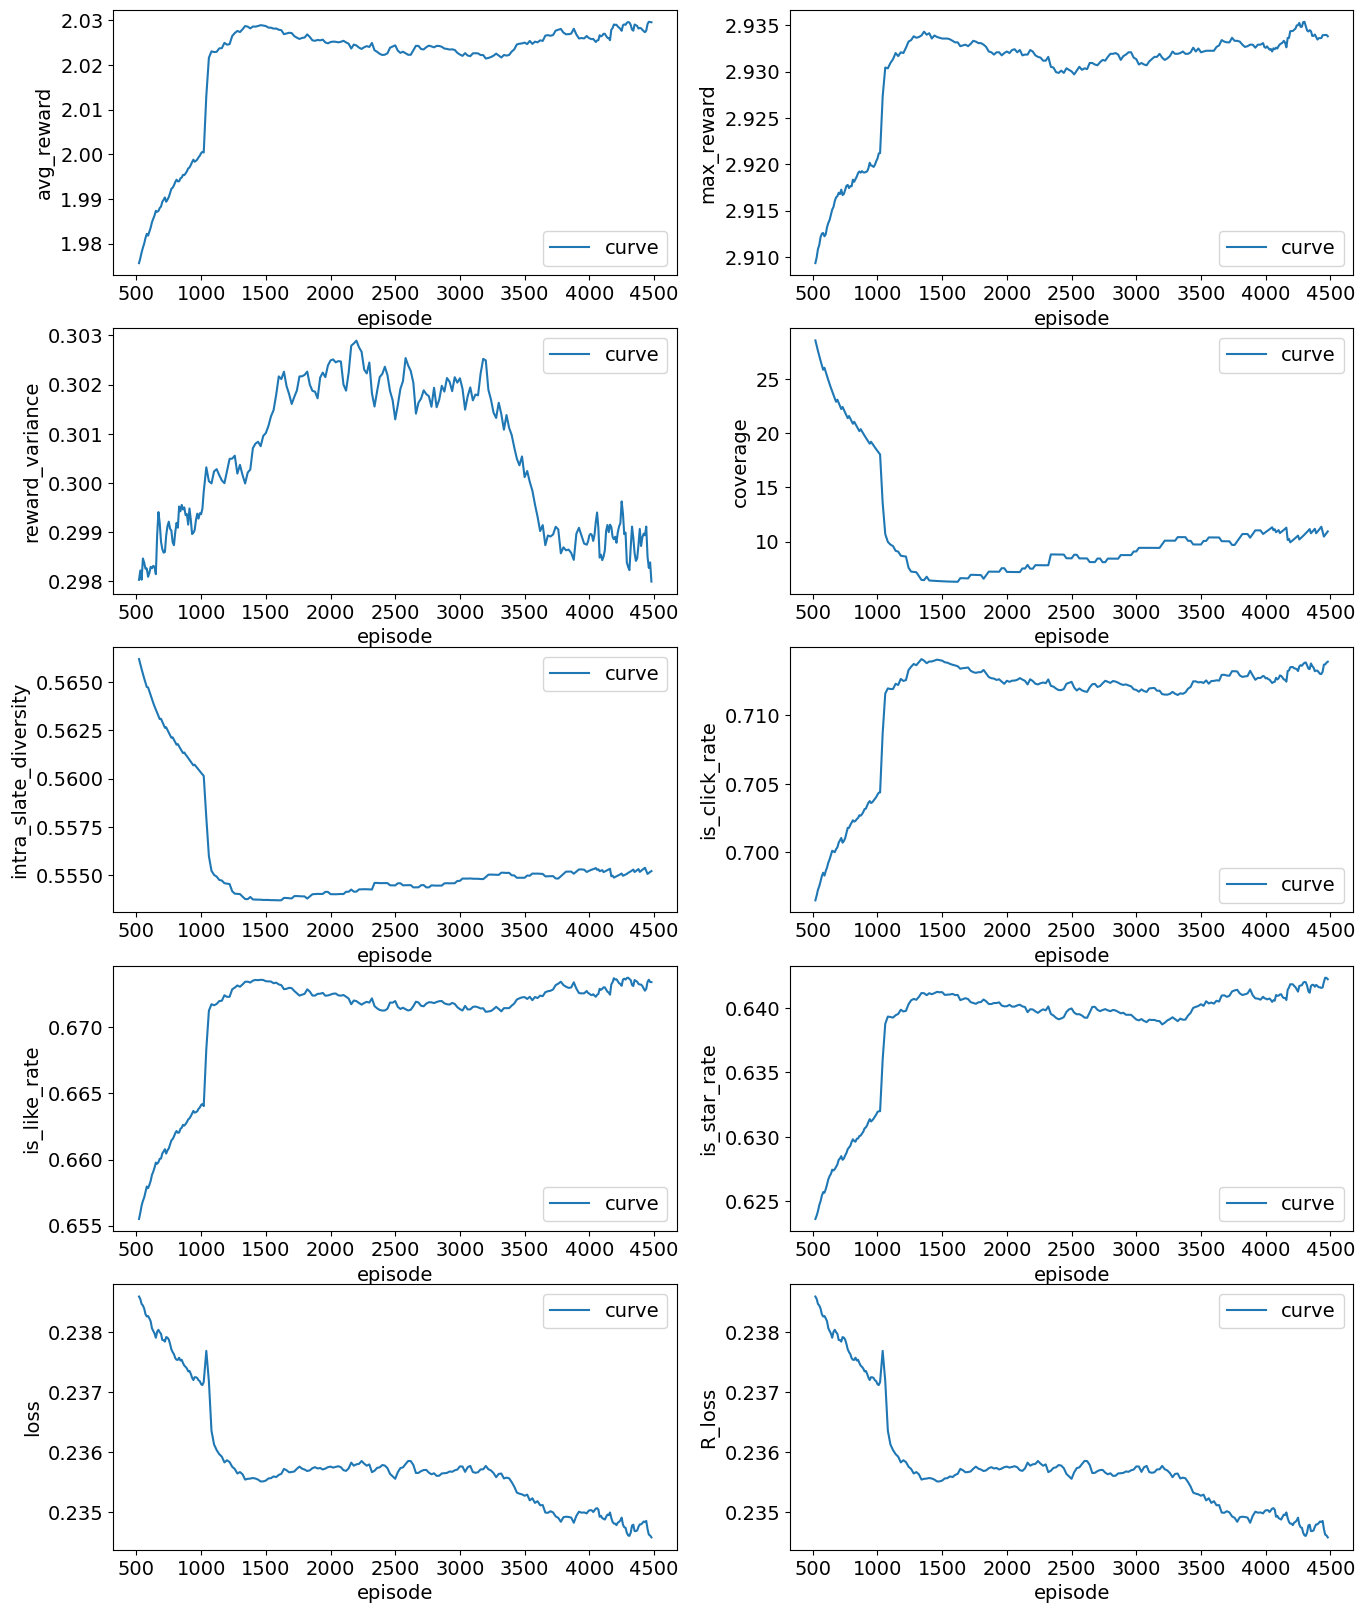

In [10]:
%matplotlib inline
from plot_utils import get_online_training_info, multiplot_multiple_lines, smooth
import numpy as np

smoothness = 100

data_key = 'ml1m' 
# data_key = 'kuairand_1k'

model_key = 'CF'
# model_key = 'SlateGFN_DB'
# model_key = 'ListCVAE'

expe = example_experiments[data_key][model_key]

log_path = "output/" + data_key + "/agent/" + expe  + "/model.report"
info = get_online_training_info(log_path, training_losses = model_loss_observation[model_key])

for k in list(info.keys()):
    v = info[k]
    info[k] = smooth(np.array(v), smoothness)
    
print('\t'.join([k for k,v in info.items()]))
print('\t'.join([str(v[-1]) for k,v in info.items()]))
print('\t'.join([str(len(v)) for k,v in info.items()]))
multiplot_multiple_lines(["curve"], [info], 'episode')

In [1]:

model_loss_observation = {
    'CF': ['loss', 'R_loss'],
    'SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'],
    'SlateGFN_TB': ['loss', 'TB_loss'],
    'ListCVAE': ['loss', 'rec_loss', 'KLD'],
    'RerankTopK': ['loss', 'initial_loss', 'rerank_loss'],
    'PRM': ['loss', 'initial_loss', 'rerank_loss', 'pv_loss'],
    'GRN': ['loss', 'initial_loss', 'rerank_loss', 'evaluator_loss', 'generator_loss', 'Q', 'advantage'],
    'Rerank_SlateGFN_DB': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob']
}

2.0,seed(11)


249it [00:00, 22267.32it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	2.0295407750442918	2.9338235857439976	0.29799652061626025	10.934313725490195	0.5552232491181177	0.7139042276669952	0.6734030528103603	0.6422334755752601	0.2345795536012042	0.2345795536012042
2.0,seed(13)


249it [00:00, 22138.46it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	1.9659505948132157	2.9150327511862213	0.3207197139952697	9.655882352941177	0.6076879031664016	0.6946282878225924	0.6534109672202784	0.6179113244309145	0.24357156100518565	0.24357156100518565
2.0,seed(17)


249it [00:00, 22388.08it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	2.123695444476371	2.9493464497958914	0.2537920645492919	6.118627450980393	0.46036367033626524	0.7411777665802076	0.7063712928517193	0.6761463635108051	0.2219953249336457	0.2219953249336457
2.0,seed(19)


249it [00:00, 22271.59it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	2.0844912443090884	2.9406863242972134	0.2635230519754045	22.936274509803926	0.48029318530769904	0.7281658699699476	0.6909543702415392	0.6653709856318492	0.22410786619373396	0.22410786619373396
2.0,seed(23)


249it [00:00, 22345.93it/s]

episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	R_loss
4480.0	2.1591401915339863	2.9578431691609173	0.23805707287700734	20.17156862745098	0.5416703373339831	0.7506331898418128	0.722394576113598	0.6861124079893616	0.20604289854858437	0.20604289854858437


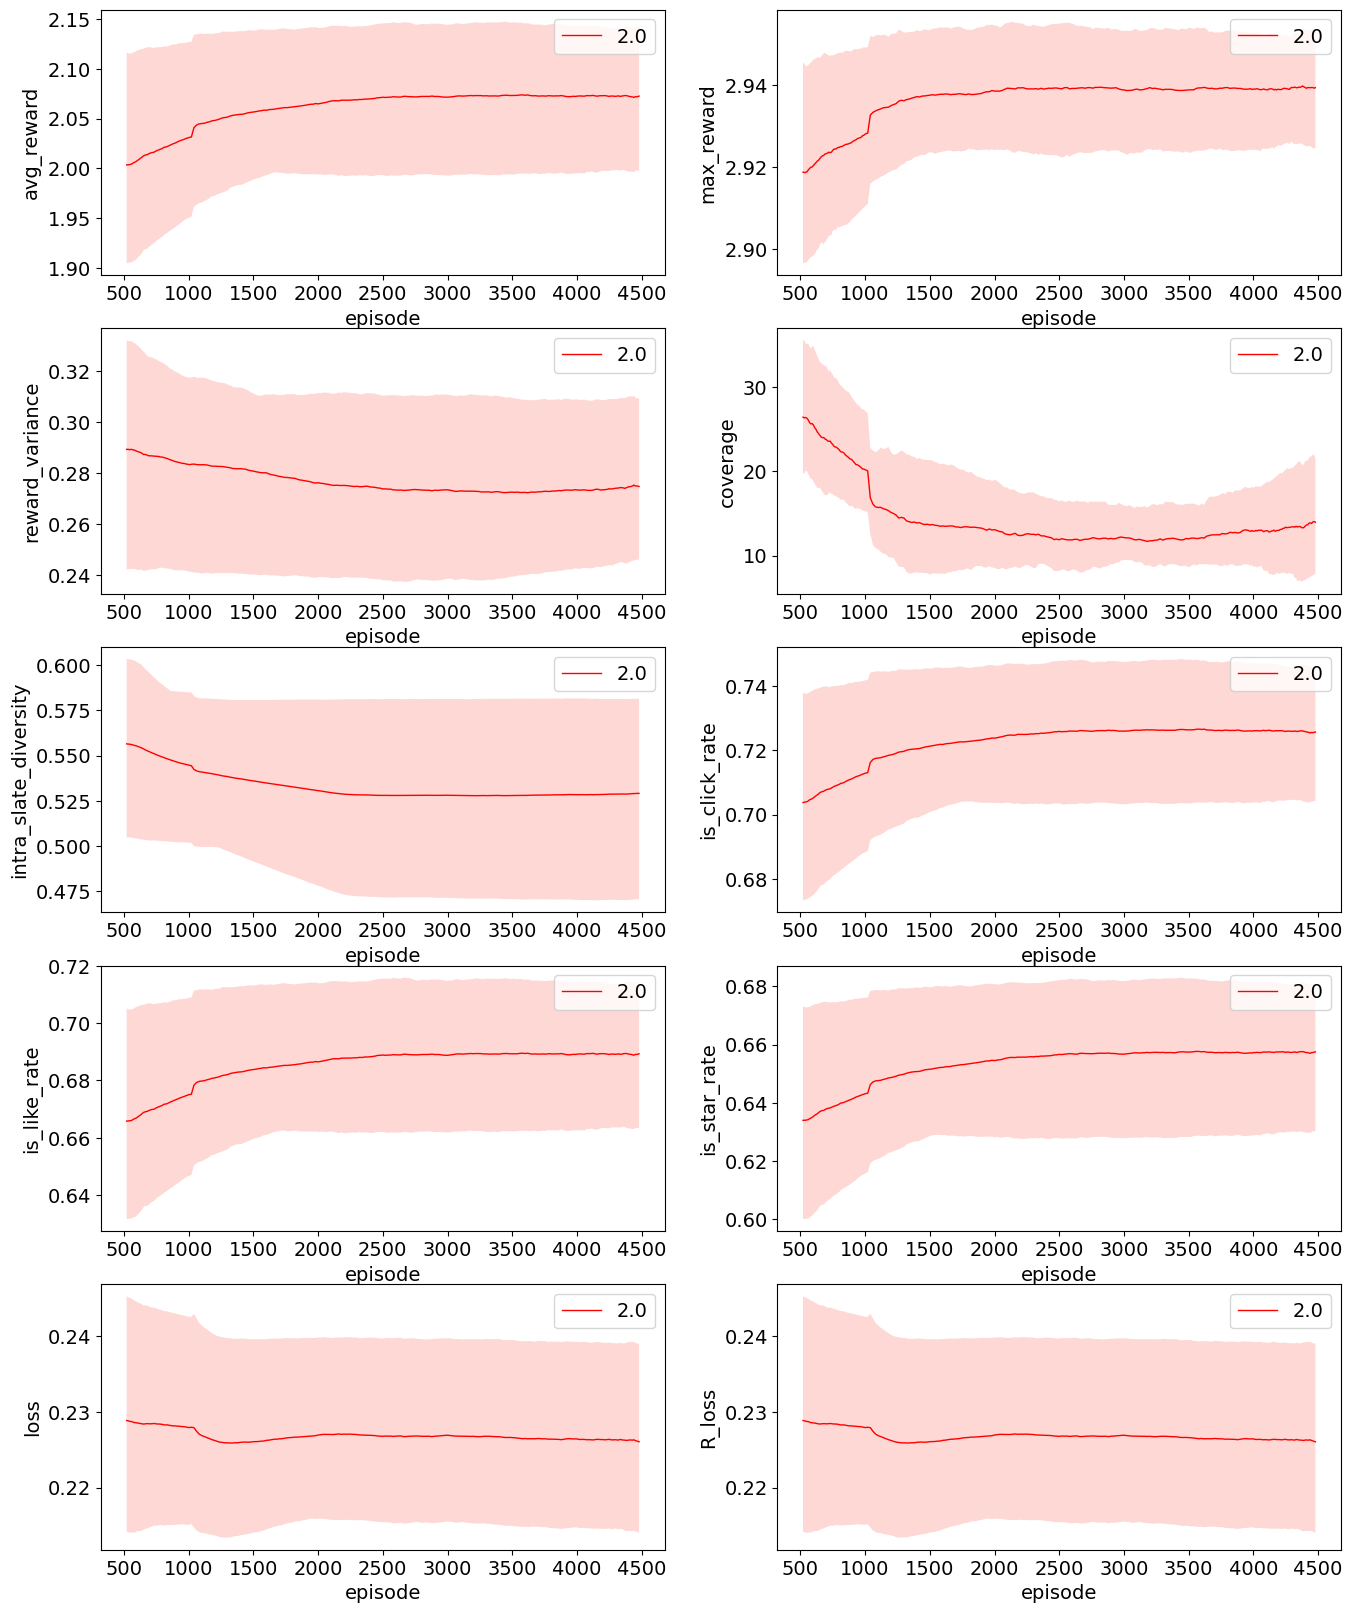

In [7]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

data_key = 'ml1m'
# data_key = 'kuairand_1k'
REG = "0"
# L = ['0.0001', '0.00003']
L = ['2.0']
# L = ['0']
stats = []
for l in L:
    model_stats = []
    for seed in [13,17,19,23]: # 11,13,17,19,23
        print(f"{l},seed({seed})")
#         expe = f"BaseOnlineAgent_SlateGFN_DB_R1.0_F0.8_Z0_actor{l}_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_TB_R0.1_F1.0_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
        expe = f"BaseOnlineAgent_PointwiseRanker_actor0.0003_niter5000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"OnlineRerankAgent_PRM_actor0.0001_init1.0_pv0.1_c50_niter5000_reg0_ep0.05_seed{seed}"
#         expe = f"BaseOnlineAgent_ListCVAE_beta0.01_rt2.0_actor0.00001_niter5000_reg0.0001_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_TB_R0.3_F{l}_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"

        log_path = "output/" + data_key + "/agent/" + expe  + "/model.report"

        info = get_online_training_info(log_path, training_losses = model_loss_observation['CF'])
#         info = get_online_training_info(log_path, training_losses = ['loss', 'TB_loss'])
#         info = get_online_training_info(log_path, training_losses = ['loss', 'initial_loss', 'rerank_loss'])
#         info = get_online_training_info(log_path, training_losses = ['loss', 'initial_loss', 'rerank_loss', 'pv_loss'])
#         info = get_online_training_info(log_path, training_losses = ['loss', 'initial_loss', 'rerank_loss', 
#                 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'])
#         info = get_online_training_info(log_path, training_losses = ['loss', 'initial_loss', 'rerank_loss', 'evaluator_loss', 'generator_loss', 'Q', 'advantage'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        model_stats.append(info)
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    stats.append(model_stats)
plot_mean_var_line(L, stats, "episode",  ncol = 2, row_height = 4, window = None)


In [ ]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

SlateGFN_stats = []
for seed in [11,13,17,19,23]
    expe = f"BaseOnlineAgent_SlateGFN_DB_Sup_R1.0_F0.8_Z0_alpha0.1_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
    # expe = "BaseOnlineAgent_PointwiseRanker_actor0.00001_niter5000_reg0_ep0.05_bs128_epbs128_seed11"
    log_path = "output/ml1m/agent/" + expe  + "/model.report"
    info = get_online_training_info(log_path, training_losses = ['actor_loss'])
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v), smoothness)
    SlateGFN_stats.append(info)
    
PointwiseRanker_stats = []
for seed in [11,13,17,19,23]
    expe = f"BaseOnlineAgent_PointwiseRanker_actor0.00001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
    log_path = "output/ml1m/agent/" + expe  + "/model.report"
    info = get_online_training_info(log_path, training_losses = ['actor_loss'])
    for k in list(info.keys()):
        v = info[k]
        info[k] = smooth(np.array(v), smoothness)
    PointwiseRanker_stats.append(info)

    
print('\t'.join([k for k,v in info.items()]))
print('\t'.join([str(v[-1]) for k,v in info.items()]))
print('\t'.join([str(len(v)) for k,v in info.items()]))
multiplot_multiple_lines(["curve"], [info], 'episode')

### Learning Rate

LR(0.00003),seed(11)


499it [00:00, 17525.00it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss	R_loss
9480.0	2.0171735377872686	3.929411881577735	0.4528058747742691	31.5264705882353	0.5981670957569982	0.4289190255251585	0.418262366892076	0.2789815765677714	0.29764987719701785	0.3058057700009907	0.28755490188212957	0.29446487905932406	-0.021171372858624832	-0.021171372858624832
LR(0.00003),seed(13)


499it [00:00, 16263.18it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss	R_loss
9480.0	1.8046760777632396	3.778594866219689	0.4597187055968771	38.62450980392157	0.6331136125852078	0.36170216474462963	0.3464511943798439	0.26650838293865614	0.2574295422317935	0.2814108552447721	0.2911739268431477	0.299562152182939	-0.021014553184767124	-0.021014553184767124
LR(0.00003),seed(17)


499it [00:00, 17283.03it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss	R_loss
9480.0	1.7138953348000843	3.7086602234372905	0.45571676796557864	38.54803921568627	0.6193656340533611	0.329130932805585	0.3127055345066622	0.26191534731610144	0.2433721470628299	0.2740898276514867	0.2926815352603501	0.30602533687271327	-0.021265895994763605	-0.021265895994763605
LR(0.00003),seed(19)


499it [00:00, 16794.31it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss	R_loss
9480.0	1.8429420099538916	3.8009804933678875	0.4556647028993157	49.999019607843145	0.6301922633951786	0.37607359050535694	0.360370720864511	0.2688546867347231	0.2650007746529346	0.2832120707368149	0.28943015648161663	0.29833921487717063	-0.020996364195575462	-0.020996364195575462
LR(0.00003),seed(23)


499it [00:00, 17406.79it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss	R_loss
9480.0	1.9602099431496043	3.8846406399034983	0.45922468395209776	29.309803921568626	0.5885609267973432	0.41725516681577646	0.406066186170952	0.2725592416291143	0.28618899085650257	0.29560484054918384	0.2825354978442192	0.2901067294618662	-0.020994357763807855	-0.020994357763807855


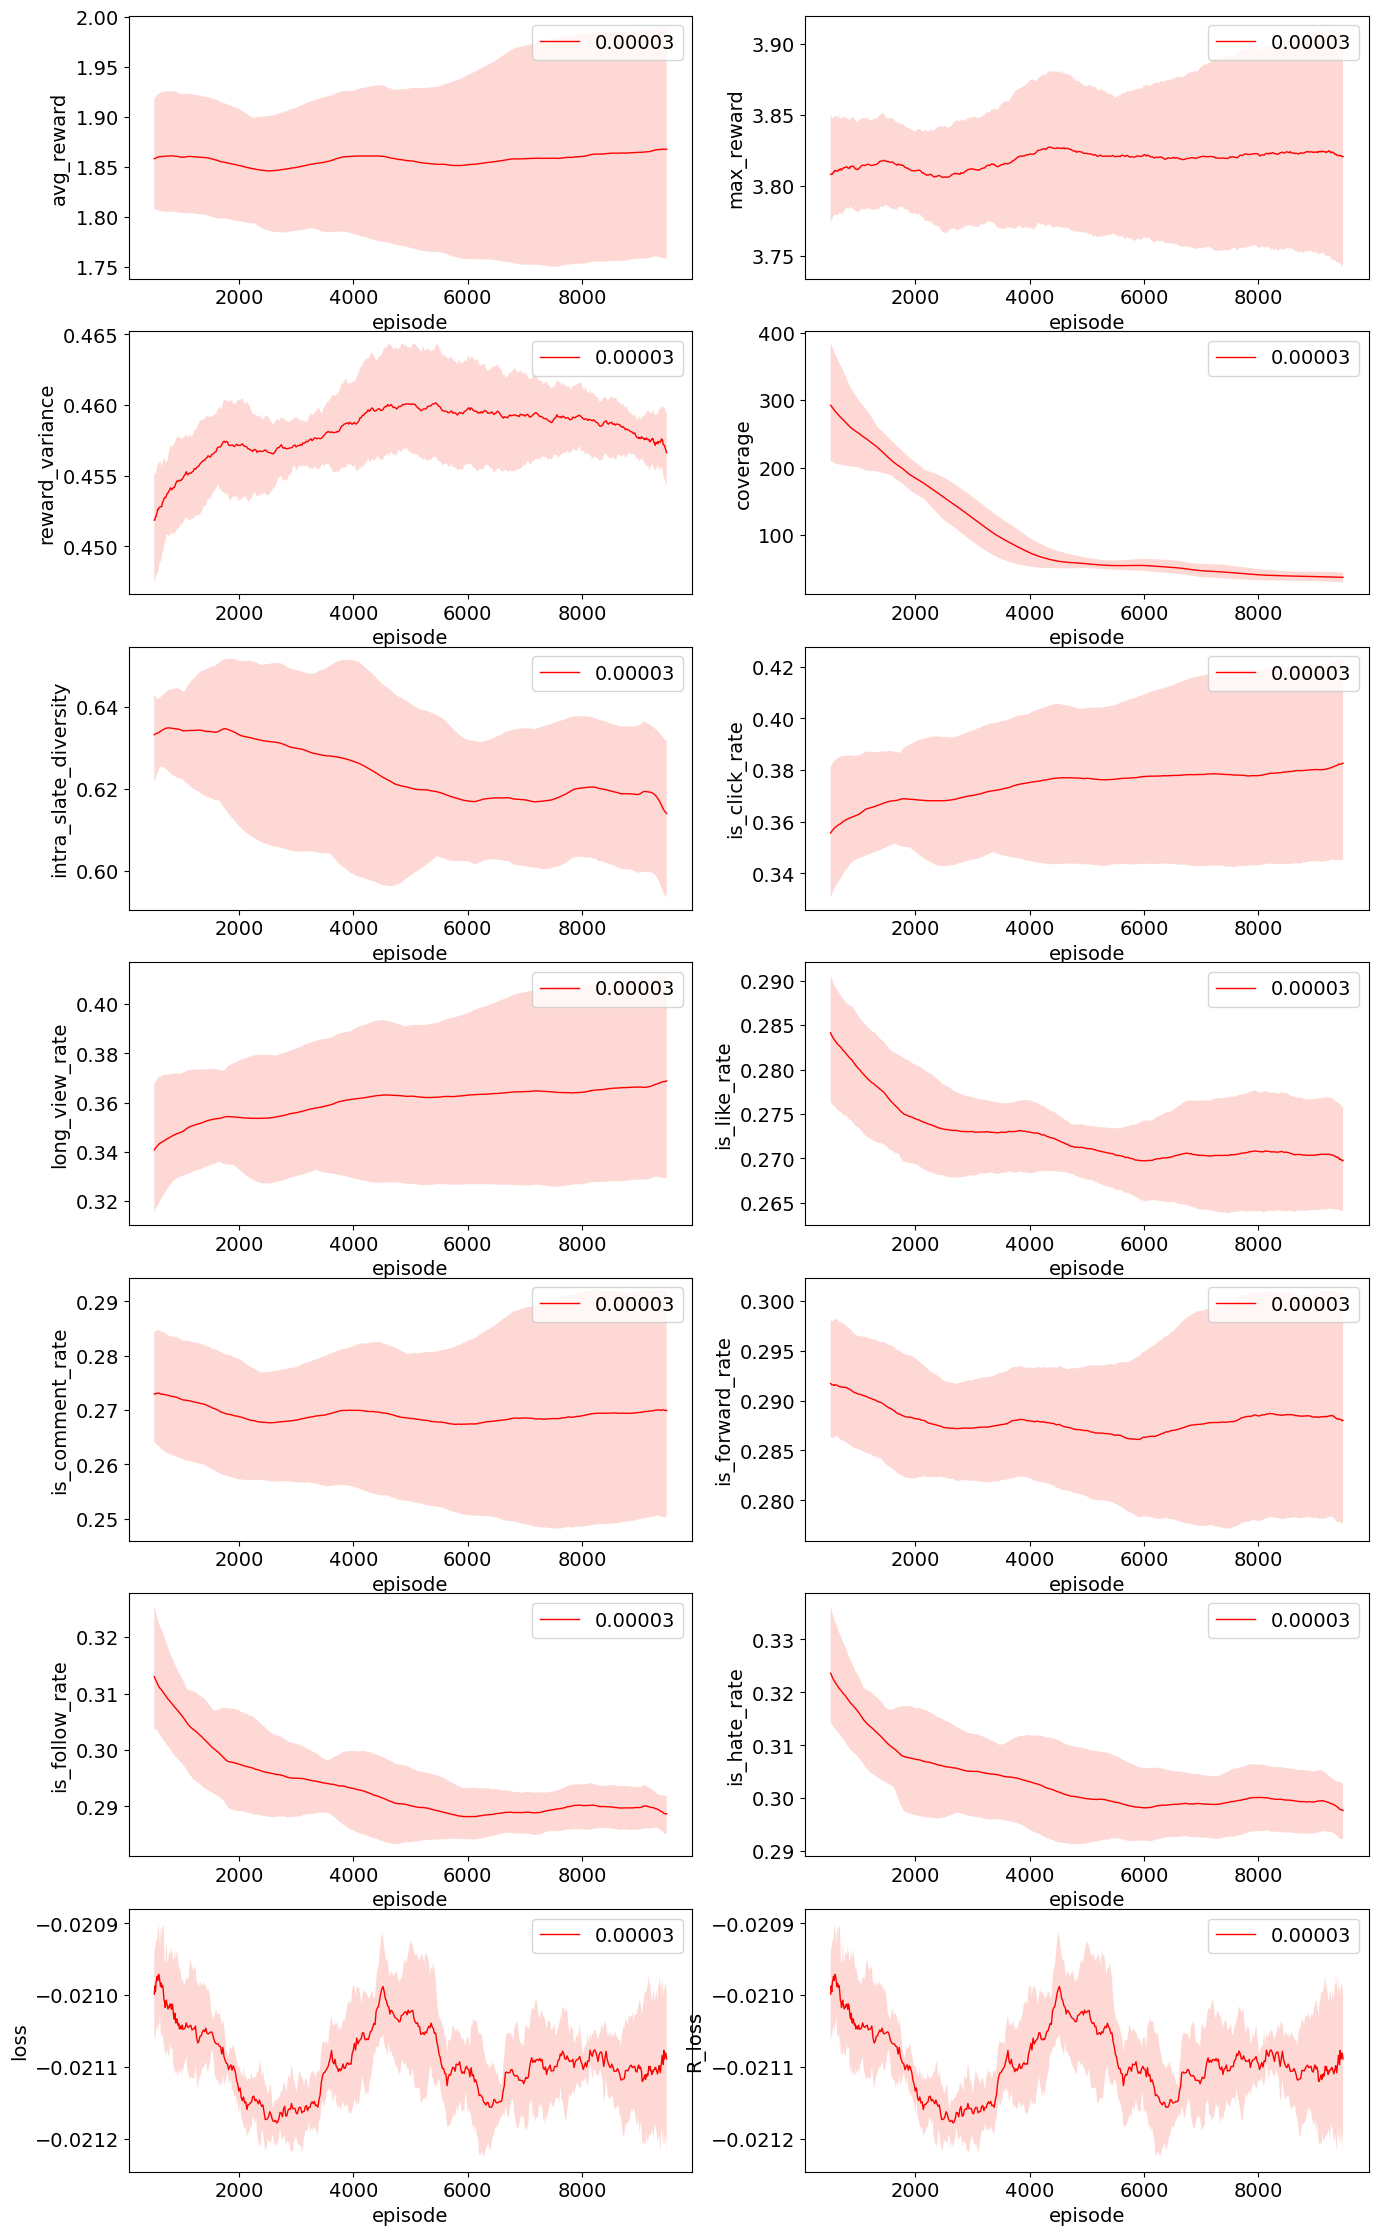

In [13]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

# data_key = 'ml1m'
data_key = 'kuairand_1k'

POS = '0.6'
LR_list = ['0.00003']
# LR_list = ['0.0001', '0.00003', '0.00001']
LR_stats = []
for LR in LR_list:
    model_stats = []
    for seed in [11,13,17,19,23]:
        print(f"LR({LR}),seed({seed})")
#         expe = f"BaseOnlineAgent_SlateGFN_DB_Sup_R1.0_F0.8_Z0_alpha0.1_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
        # expe = "BaseOnlineAgent_PointwiseRanker_actor0.00001_niter5000_reg0_ep0.05_bs128_epbs128_seed11"
#         expe = f"BaseOnlineAgent_PointwiseRanker_actor{LR}_niter5000_reg{REG}_ep0.05_bs128_epbs128_seed{seed}"
        expe = f"OfflineAgentWithOnlineTest_PointwiseRanker_actor{LR}_pos0.6_neg0.1_niter10000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         log_path = "output/ml1m/agent/" + expe  + "/model_test.report"
        log_path = "output/" + data_key + "/agent/" + expe  + "/model.report"
        info = get_online_training_info(log_path, training_losses = ['loss', 'R_loss'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        model_stats.append(info)
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    LR_stats.append(model_stats)
plot_mean_var_line(LR_list, LR_stats, "episode",  ncol = 2, row_height = 4, window = None)


#### Pos Offset

BZ(0.1),seed(11)


249it [00:00, 4423.25it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	2.000266874888364	2.926634047428767	0.28195672076122436	98.00882352941174	0.6340722769206645	0.7001583117480371	0.6638403997993937	0.6362681469496558	0.01871481764532041	0.01871481764532041
BZ(0.1),seed(13)


249it [00:00, 22024.54it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	2.0358507731965942	2.931699405464472	0.2747626020481773	87.19803921568628	0.6275260853416779	0.7138927378198682	0.6764859265556521	0.6454720893619107	0.01759405003440585	0.01759405003440585
BZ(0.1),seed(17)


249it [00:00, 22499.01it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9452768274382048	2.9153595498963902	0.3016807953224463	127.7627450980392	0.6545962893057102	0.6860409199899318	0.6444355287680439	0.6148003672413966	0.018951510595084695	0.018951510595084695
BZ(0.5),seed(11)


249it [00:00, 22239.34it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9991064913716974	2.9261438527527974	0.2884105701072543	99.57156862745097	0.6211293360766242	0.7008936060409922	0.6639144400463385	0.6342984272861013	0.018682041268467026	0.018682041268467026
BZ(0.5),seed(13)


249it [00:00, 22318.23it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9490184033618254	2.910784387822244	0.2839546175417947	134.7627450980392	0.6482075188674179	0.6854358352866826	0.6463209963166245	0.6172615596768903	0.019398655022914504	0.019398655022914504
BZ(0.5),seed(17)


249it [00:00, 22372.74it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.967605006636358	2.9227124861642424	0.2983645181153335	115.15098039215688	0.6499404635061236	0.6931921659439219	0.6522110078556864	0.6222018169860045	0.01834756907203472	0.01834756907203472
BZ(1.0),seed(11)


249it [00:00, 22275.87it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	2.0361418234366995	2.9321895993223372	0.2800562336310452	95.90294117647059	0.6011686141292255	0.7123123653379142	0.6761348742480373	0.6476945671380735	0.018192325488609423	0.018192325488609423
BZ(1.0),seed(13)


249it [00:00, 22805.09it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	2.0169986488772373	2.927777838590098	0.2792100386876686	110.34901960784315	0.6317790664878546	0.708106126387914	0.6699512552981282	0.6389412467386208	0.01813480368468399	0.01813480368468399
BZ(1.0),seed(17)


249it [00:00, 22487.87it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.98830558014851	2.924673268140531	0.29357227287163923	109.73921568627452	0.6442117907106876	0.6995876936935911	0.6599060651718401	0.6288118058413851	0.017937734904790333	0.017937734904790333
BZ(1.5),seed(11)


249it [00:00, 22214.74it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9122026338296778	2.8972223058635116	0.3100991914231403	99.60098039215686	0.6560752630525946	0.6748532164622756	0.6335248361323395	0.6038245706581602	0.01941224879256504	0.01941224879256504
BZ(1.5),seed(13)


249it [00:00, 22448.24it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9972376145568551	2.925490261292925	0.28974282832122317	115.20784313725491	0.6312176934059929	0.7026284406582515	0.6629608546694121	0.6316483054383129	0.018616619321755044	0.018616619321755044
BZ(1.5),seed(17)


249it [00:00, 22085.09it/s]


episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss	TB_loss
4480.0	1.9663514358155865	2.923529479316637	0.29971295947245524	114.35882352941177	0.6396645135301001	0.6923075155592433	0.6514093335352691	0.6226345679485329	0.018351780425063243	0.018351780425063243


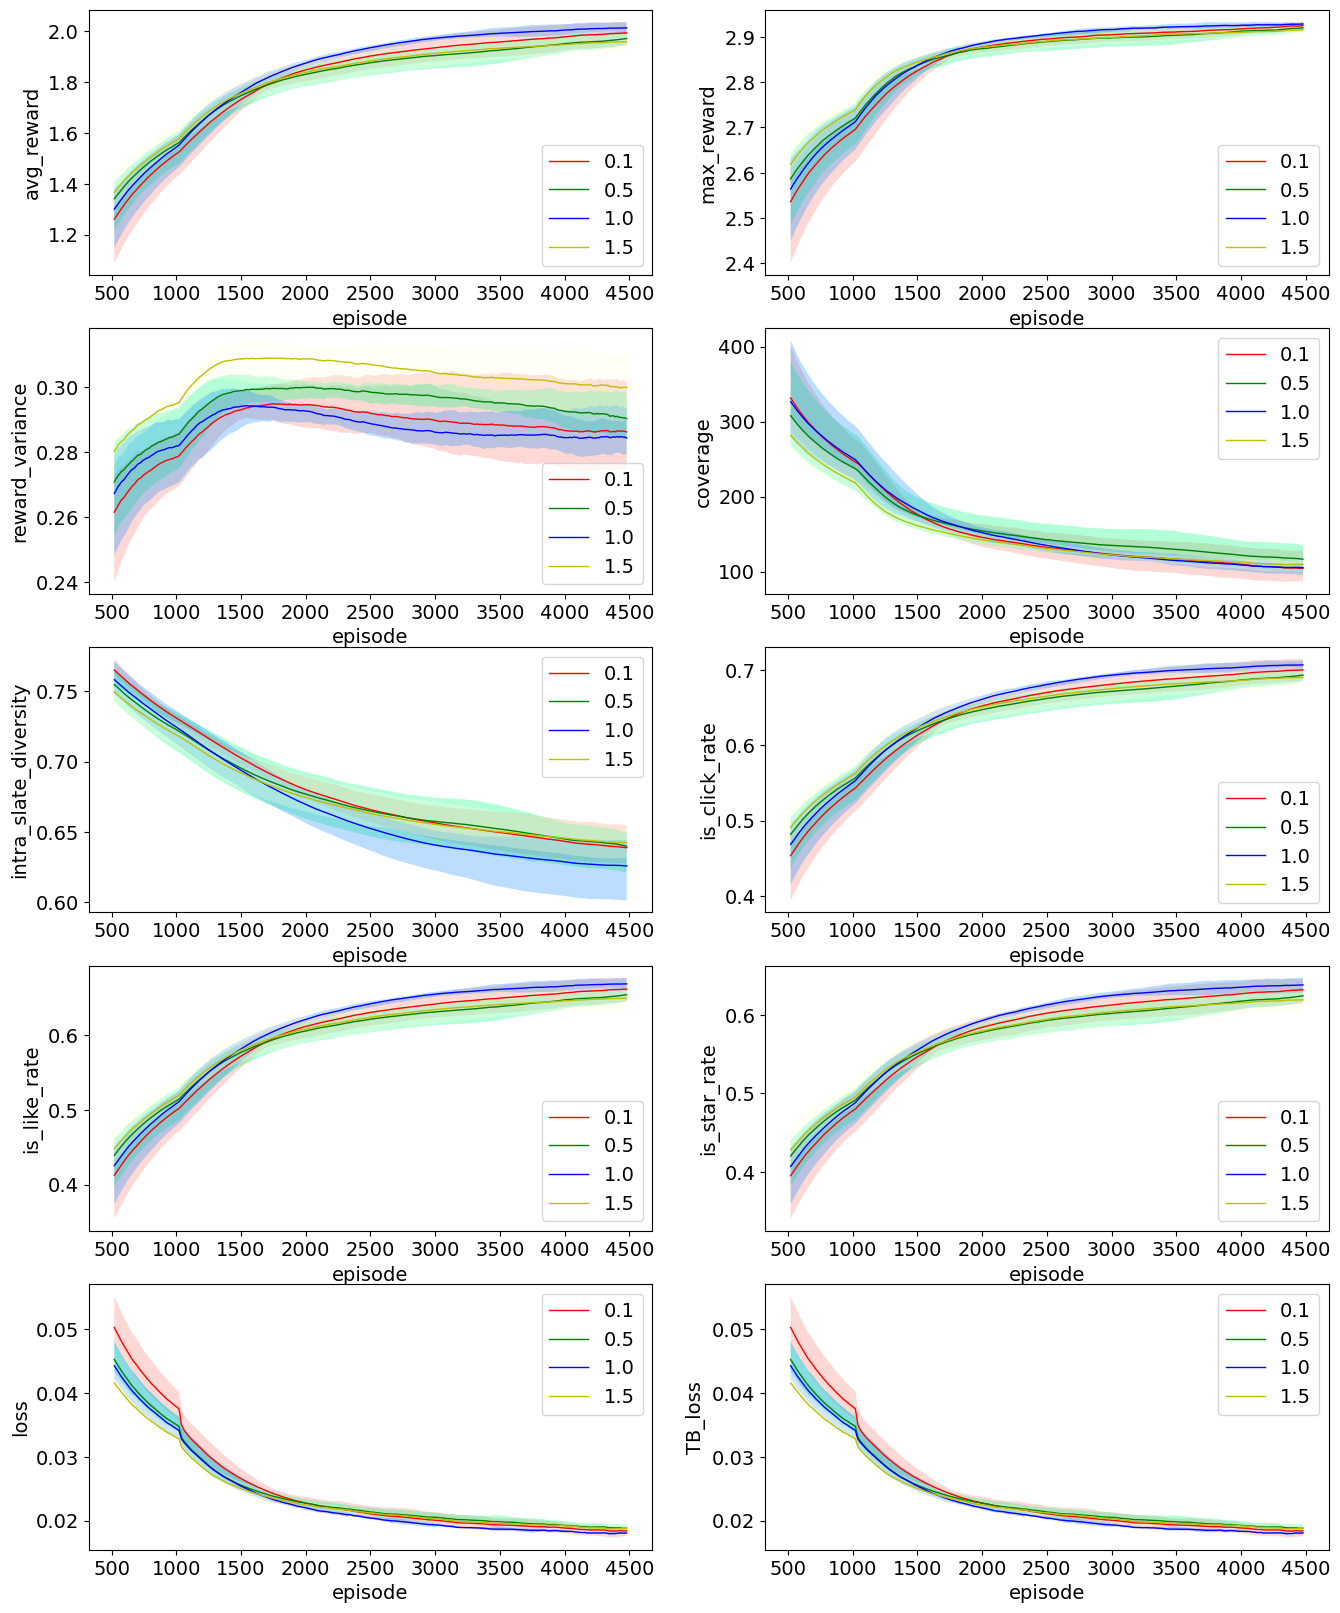

In [14]:

%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 100

REG = "0"
LR = '0.00003'
# param_list = ['0.2', '0.4', '0.6', '0.8', '1.0']
# param_list = ['0.1', '0.3', '0.5', '0.7', '0.9']
# param_list = ['0', '0.1', '0.5', '1.0']
param_list = ['0.1', '0.5', '1.0', '1.5']
param_stats = []
# for b_r in param_list:
# for b_f in param_list:
for b_z in param_list:
    model_stats = []
    for seed in [11,13,17]:
#         print(f"BR({b_r}),seed({seed})")
#         print(f"BF({b_f}),seed({seed})")
        print(f"BZ({b_z}),seed({seed})")
#         expe = f"BaseOnlineAgent_SlateGFN_DB_R{b_r}_F0.3_Z0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_DB_R0.4_F{b_f}_Z0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_DB_R0.4_F0.3_Z{b_z}_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_TB_R{b_r}_F0.8_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"BaseOnlineAgent_SlateGFN_TB_R1.0_F{b_f}_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
        expe = f"BaseOnlineAgent_SlateGFN_TB_R1.0_F0.8_Z{b_z}_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
        
#         expe = f"BaseOnlineAgent_SlateGFN_DB_Sup_R1.0_F0.8_Z0_alpha0.1_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
        # expe = "BaseOnlineAgent_PointwiseRanker_actor0.00001_niter5000_reg0_ep0.05_bs128_epbs128_seed11"
#         expe = f"BaseOnlineAgent_PointwiseRanker_actor{LR}_niter5000_reg{REG}_ep0.05_bs128_epbs128_seed{seed}"
#         expe = f"OfflineAgentWithOnlineTest_PointwiseRanker_actor{LR}_pos{POS}_neg0.1_niter5000_reg0_ep0.05_bs128_epbs128_seed{seed}"
#         log_path = "output/ml1m/agent/" + expe  + "/model_test.report"
        log_path = "output/output/ml1m/agent/" + expe  + "/model.report"
        info = get_online_training_info(log_path, training_losses = ['loss', 'TB_loss'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        model_stats.append(info)
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    param_stats.append(model_stats)
plot_mean_var_line(param_list, param_stats, "episode",  ncol = 2, row_height = 4, window = None)


## DB vs TB

model(GFN_DB),seed(13)


250it [00:00, 17859.96it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	2.142755768515847	2.954545497894287	0.25807411020452325	10.181818181818182	0.5621955746954138	0.7520123286680742	0.713186572898518	0.6775568398562345	0.05884760589423504
model(GFN_DB),seed(17)


250it [00:00, 18066.13it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	2.1206203373995693	2.9696969985961914	0.26941987059333106	7.909090909090909	0.5756224881518971	0.7578125216744163	0.6972064592621543	0.6656013456257907	0.05559997895563191
model(GFN_DB),seed(19)


250it [00:00, 17677.20it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	1.7930871898477727	2.909090995788574	0.335241900248961	7.181818181818182	0.6084836938164451	0.6386126984249462	0.5942234992980957	0.5602509596131064	0.08953453405675563
model(GFN_TB),seed(11)


250it [00:00, 22858.74it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	2.1364821087230337	2.9242424964904785	0.2642264650626616	12.090909090909092	0.5753942971879785	0.7505918795412237	0.7137784307653253	0.672111760486256	0.04385290172967044
model(GFN_TB),seed(13)


250it [00:00, 23318.79it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	2.208688497543335	2.9696969985961914	0.22610937465320935	13.454545454545455	0.5340906950560483	0.7705966180021112	0.7365057034925981	0.7015861923044379	0.028616670430214566
model(GFN_TB),seed(17)


250it [00:00, 22748.64it/s]

dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'is_like_rate', 'is_star_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	is_like_rate	is_star_rate	loss
4880.0	2.1606298359957608	2.954545497894287	0.24297370152039963	18.727272727272727	0.5777548714117571	0.7544981187040155	0.7244318398562345	0.6816998286680742	0.03394765806045722


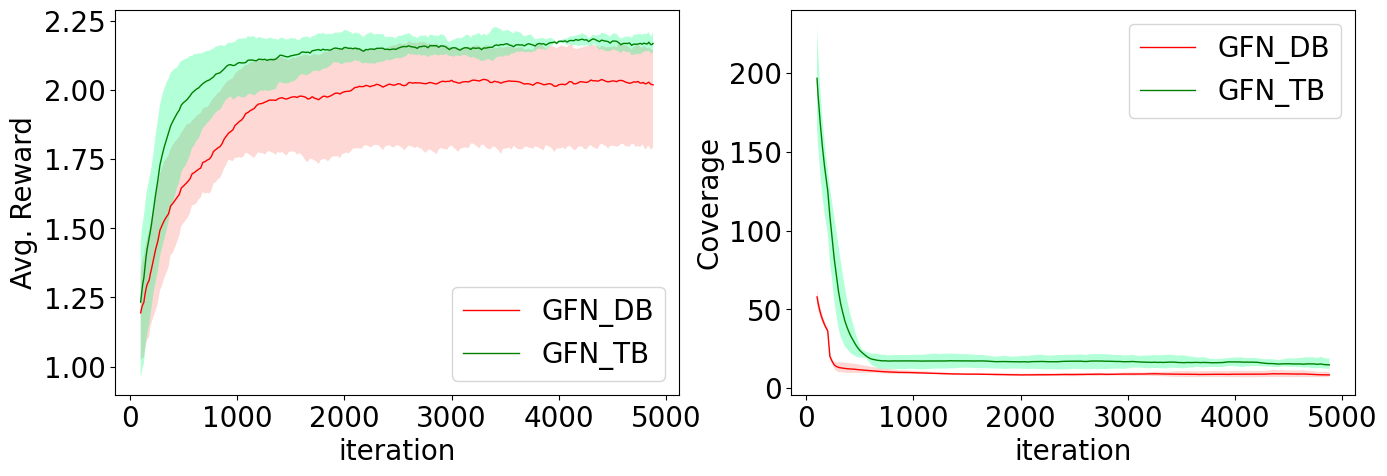

In [13]:



%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 20

model_list = {'GFN_DB': 
                  {'path': "BaseOnlineAgent_SlateGFN_DB_R0.1_F0.4_Z0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'], 
                   'seeds': [13,17,19]}, 
              'GFN_TB': 
                  {'path': "BaseOnlineAgent_SlateGFN_TB_R0.3_F1.0_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'TB_loss'], 
                   'seeds': [11,13,17]}, 
             }

# observe_metric = {'episode': 'iteration',
#                   'avg_reward': 'Avg. Reward', 
#                   'max_reward': 'Max Reward',
#                   'coverage': 'Coverage', 
#                   'intra_slate_diversity': 'ILD',
#                   'is_click_rate': 'Click Rate', 
#                   'long_view_rate': 'View Rate',
#                   'is_like_rate': 'Like Rate', 
#                   'is_comment_rate': 'Comment Rate',
#                   'is_forward_rate': 'Forward Rate',
#                   'is_follow_rate': 'Follow Rate',
#                   'is_hate_rate': 'Hate Rate',}


# observe_metric = {'episode': 'iteration',
#                   'avg_reward': 'Avg. Reward', 
#                   'max_reward': 'Max Reward',
#                   'coverage': 'Coverage', 
#                   'intra_slate_diversity': 'ILD',
#                   'is_click_rate': 'Click Rate', 
#                   'is_like_rate': 'Like Rate',
#                   'is_star_rate': 'Star Rate'}

# observe_metric = {'episode': 'iteration',
#                   'avg_reward': 'Avg. Reward', 
#                   'max_reward': 'Max Reward',
#                   'coverage': 'Coverage', 
#                   'intra_slate_diversity': 'ILD'}

observe_metric = {'episode': 'iteration',
                  'avg_reward': 'Avg. Reward',
                  'coverage': 'Coverage'}

all_model_stats = []
for model_key in model_list:
    model_stats = []
    for seed in model_list[model_key]['seeds']:
        print(f"model({model_key}),seed({seed})")
        expe = model_list[model_key]['path'] + str(seed)
#         log_path = "output/kuairand_1k/log_GFN/" + expe  + "/model_test.report"
        log_path = "output/ml1m/agent/" + expe  + "/model_test.report"
        info = get_online_training_info(log_path, training_losses = ['loss'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        print(info.keys())
        model_stats.append({v: info[k] for k,v in observe_metric.items()})
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    all_model_stats.append(model_stats)
plot_mean_var_line(list(model_list.keys()), all_model_stats, "iteration",  ncol = 2, 
                   row_height = 5, window = None, save_path = "DBvsTB_ml1m.svg", font_size = 20)



model(GFN_DB),seed(11)


250it [00:00, 14030.96it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.33143949508667	4.196969855915416	0.39614838090809906	27.545454545454547	0.5314576598730955	0.5149147835644808	0.510061572898518	0.30374053662473505	0.3502604229883714	0.3470644083890048	0.30539774081923743	0.3128551217642697	0.049705957028676154
model(GFN_DB),seed(13)


250it [00:00, 14259.16it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.2200521772558037	3.9848486076701772	0.3924538709900596	46.45454545454545	0.5549492212859067	0.4956202805042267	0.4888731159947135	0.29285038872198627	0.3223248205401681	0.32492898540063336	0.29545455358245154	0.2992424314672297	0.05206385734067721
model(GFN_DB),seed(17)


250it [00:00, 14243.47it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.228930018164895	4.03030310977589	0.40552363341504877	35.36363636363637	0.532711308110844	0.5078125216744163	0.49857956712896173	0.29356061870401556	0.32007576660676434	0.3159327750856226	0.2929687581279061	0.28255209597674286	0.05127189575948499
model(GFN_DB),seed(19)


250it [00:00, 14399.56it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.391453677957708	4.015151652422818	0.39255544543266296	29.90909090909091	0.6595675322142515	0.49810607595877215	0.48804451660676434	0.33297822963107715	0.37890626083720813	0.3593750081279061	0.3340435705401681	0.34126421267336066	0.05016420359130609
model(GFN_DB),seed(23)


250it [00:00, 14381.79it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.23271783915433	3.924242518164895	0.43913607976653357	31.363636363636363	0.569476306438446	0.4992897835644809	0.4799952777949246	0.29947917840697547	0.33250474387949164	0.3237452750856226	0.2977036075158553	0.3011363717642697	0.052092459154399966
model(GFN_DB(Explore)),seed(11)


249it [00:00, 14282.73it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.2076113478703934	3.978788000887091	0.44188648042353723	471.9181818181818	0.5515842827883634	0.4978752518242056	0.4883937151594596	0.2898970267312093	0.318838787891648	0.3223899242552844	0.29021662859754127	0.291583816300739	0.049705957028676154
model(GFN_DB(Explore)),seed(13)


249it [00:00, 14286.64it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.1437204859473487	3.9416667829860335	0.42370128496126697	544.3363636363637	0.5618928049098363	0.47559778730977664	0.4634114693511617	0.28881392973390496	0.30832742479714487	0.31600379781289534	0.2915660608221184	0.29469697942787954	0.05206385734067721
model(GFN_DB(Explore)),seed(17)


249it [00:00, 14355.37it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.1607659415765244	3.94242435910485	0.43268342316150665	579.1818181818181	0.5439728850668127	0.49426492886109785	0.48220290121707043	0.2818181912330064	0.30841620354489846	0.3122100015932863	0.28185370327396825	0.2847893098538572	0.05127189575948499
model(GFN_DB(Explore)),seed(19)


249it [00:00, 14215.08it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.2110026895999906	3.9712122440338136	0.4318315703760494	477.11363636363643	0.6388055577874183	0.47681109282103445	0.4635416774587197	0.3045750578696077	0.323088314384222	0.3288589117201892	0.31412761360406877	0.3155717433853583	0.05016420359130609
model(GFN_DB(Explore)),seed(23)


249it [00:00, 14284.68it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.14459051435644	3.908333450013941	0.4304823623462157	514.4818181818182	0.612342143329707	0.4701112802733075	0.45553386468778956	0.28918679857795887	0.31096710264682764	0.31838897859508336	0.3004024717618119	0.30224314508113	0.052092459154399966
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan


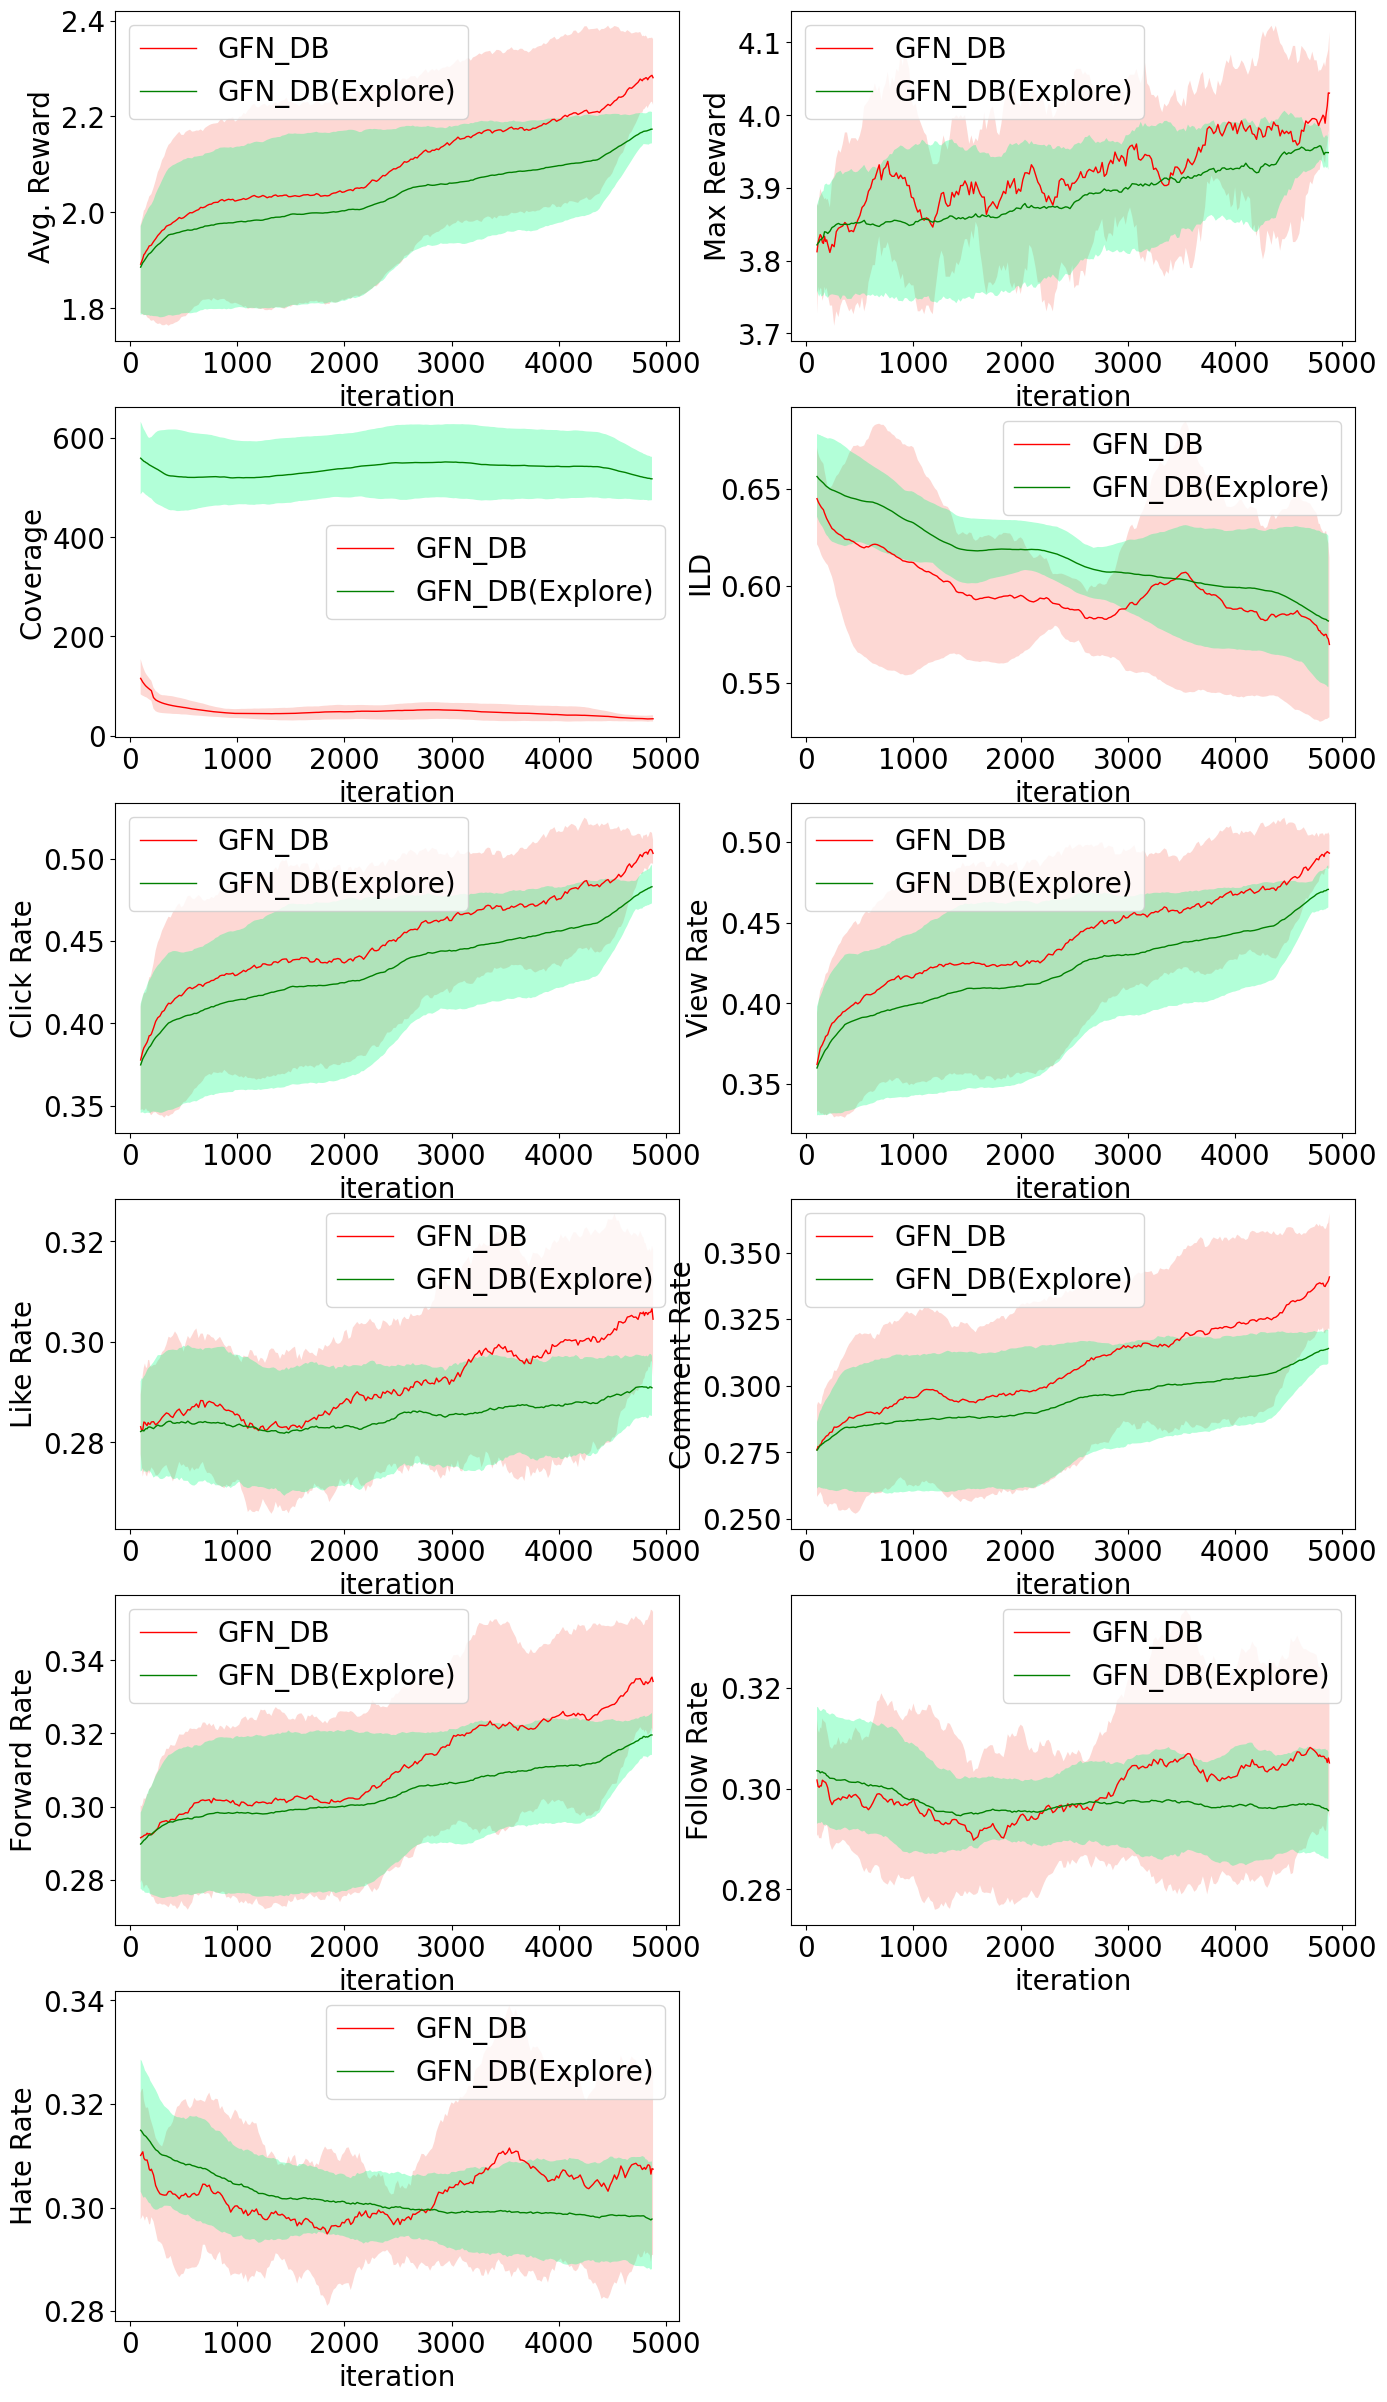

In [11]:



%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 20

model_list = {'GFN_DB': 
                  {'path': "BaseOnlineAgent_SlateGFN_DB_R0.2_F0.3_Z1.0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'], 
                   'suffix': '/model_test.report'},
              'GFN_DB(Explore)': 
                  {'path': "BaseOnlineAgent_SlateGFN_DB_R0.2_F0.3_Z1.0_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'DB_loss', 'terminal_loss', 'forward_part', 'backward_part', 'prob'], 
                   'suffix': '/model.report'},
             }

observe_metric = {'episode': 'iteration',
                  'avg_reward': 'Avg. Reward', 
                  'max_reward': 'Max Reward',
                  'coverage': 'Coverage', 
                  'intra_slate_diversity': 'ILD',
                  'is_click_rate': 'Click Rate', 
                  'long_view_rate': 'View Rate',
                  'is_like_rate': 'Like Rate', 
                  'is_comment_rate': 'Comment Rate',
                  'is_forward_rate': 'Forward Rate',
                  'is_follow_rate': 'Follow Rate',
                  'is_hate_rate': 'Hate Rate',}


# observe_metric = {'episode': 'iteration',
#                   'avg_reward': 'Avg. Reward', 
#                   'max_reward': 'Max Reward',
#                   'coverage': 'Coverage', 
#                   'intra_slate_diversity': 'ILD'}

all_model_stats = []
for model_key in model_list:
    model_stats = []
    for seed in [11,13,17,19,23]:
        print(f"model({model_key}),seed({seed})")
        expe = model_list[model_key]['path'] + str(seed)
        log_path = "output/kuairand_1k/log_GFN/" + expe + model_list[model_key]['suffix']
        info = get_online_training_info(log_path, training_losses = ['loss'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        print(info.keys())
        model_stats.append({v: info[k] for k,v in observe_metric.items()})
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    all_model_stats.append(model_stats)
plot_mean_var_line(list(model_list.keys()), all_model_stats, "iteration",  ncol = 2, 
                   row_height = 5, window = None, save_path = "DBvsDBExplore_full.svg", font_size = 20)



model(GFN4Rec),seed(11)


250it [00:00, 15793.47it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.360085292295976	4.166666811162775	0.39524707198143005	24.727272727272727	0.5165063522078774	0.5285274874080311	0.523674263195558	0.30894887718287384	0.3664772862737829	0.33297822963107715	0.29947917840697547	0.30717330358245154	0.05716676573184403
model(GFN4Rec),seed(13)


250it [00:00, 15775.18it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.44590442830866	4.030303174799139	0.3449522013014013	13.363636363636363	0.5044276064092462	0.5487689565528523	0.5450994399460879	0.3259943263097243	0.36884470690380444	0.34812974387949164	0.3090672411701896	0.30516099658879364	0.05306231883269819
model(GFN4Rec),seed(17)


250it [00:00, 15657.63it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.401041767813943	3.954545562917536	0.3690553442998366	16.545454545454547	0.5256693065166473	0.5532670617103577	0.5331439538435503	0.3166430050676519	0.3545217893340371	0.3362926244735718	0.3071733062917536	0.31321023540063336	0.052332013523714103
model(GFN4Rec),seed(19)


250it [00:00, 15717.95it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.4599905881014736	4.166666789488359	0.3966495150869543	14.454545454545455	0.5286833074959841	0.5501894138076089	0.5423769029704008	0.32788826660676434	0.368252849036997	0.35712595961310645	0.3141572041945024	0.3151041729883714	0.05211306661367417
model(GFN4Rec),seed(23)


250it [00:00, 9909.61it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.457741542295976	4.090909264304421	0.39479394121603534	11.454545454545455	0.519713816317645	0.5485322150317106	0.5424952886321328	0.3197206583890048	0.37393466992811725	0.3609138374978846	0.3121448944915425	0.3167613744735718	0.05412227086384187
model(GFN4Rec(Explore)),seed(11)


249it [00:00, 15280.35it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.181599273464897	3.968181938474828	0.4297871951352467	468.90454545454554	0.5543647149747069	0.4924005832184444	0.48066999302669006	0.2876775669103319	0.31442945951765233	0.31849551187320185	0.28792614686218176	0.2918205594474619	0.05716676573184403
model(GFN4Rec(Explore)),seed(13)


249it [00:00, 15383.89it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.2516513645648955	3.994697103717111	0.4191050651398572	406.6545454545454	0.5605584947900337	0.507321278073571	0.49900569780306375	0.29819484908472405	0.3260949422012676	0.32607126926833935	0.294963314993815	0.2962002934380011	0.05306231883269819
model(GFN4Rec(Explore)),seed(17)


249it [00:00, 15244.00it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.257078670913523	3.9848486065864566	0.41254798593846237	383.7318181818182	0.5776994109153748	0.5047822113741529	0.49582742764191196	0.3010653500529853	0.3279474529353055	0.3274443760514259	0.30001184771006756	0.3011718857017431	0.052332013523714103
model(GFN4Rec(Explore)),seed(19)


249it [00:00, 15389.79it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.2660216239365663	4.032575898820704	0.4139805826273831	341.11818181818177	0.5658220717852765	0.5113991643894802	0.5019768151369961	0.2988991582935507	0.32843277576294816	0.33052794526923795	0.2947857581079006	0.29744319265538993	0.05211306661367417
model(GFN4Rec(Explore)),seed(23)


249it [00:00, 15390.92it/s]


dict_keys(['episode', 'avg_reward', 'max_reward', 'reward_variance', 'coverage', 'intra_slate_diversity', 'is_click_rate', 'long_view_rate', 'is_like_rate', 'is_comment_rate', 'is_forward_rate', 'is_follow_rate', 'is_hate_rate', 'loss'])
episode	avg_reward	max_reward	reward_variance	coverage	intra_slate_diversity	is_click_rate	long_view_rate	is_like_rate	is_comment_rate	is_forward_rate	is_follow_rate	is_hate_rate	loss
4880.0	2.24848493012515	4.001515266028317	0.4229324229738929	393.91818181818184	0.5800458631732247	0.5037227900190787	0.4918797490271655	0.299112225391648	0.32542022927240893	0.3281486841765317	0.30020124024965544	0.29705256684259934	0.05412227086384187
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan
ylim: nan nan nan


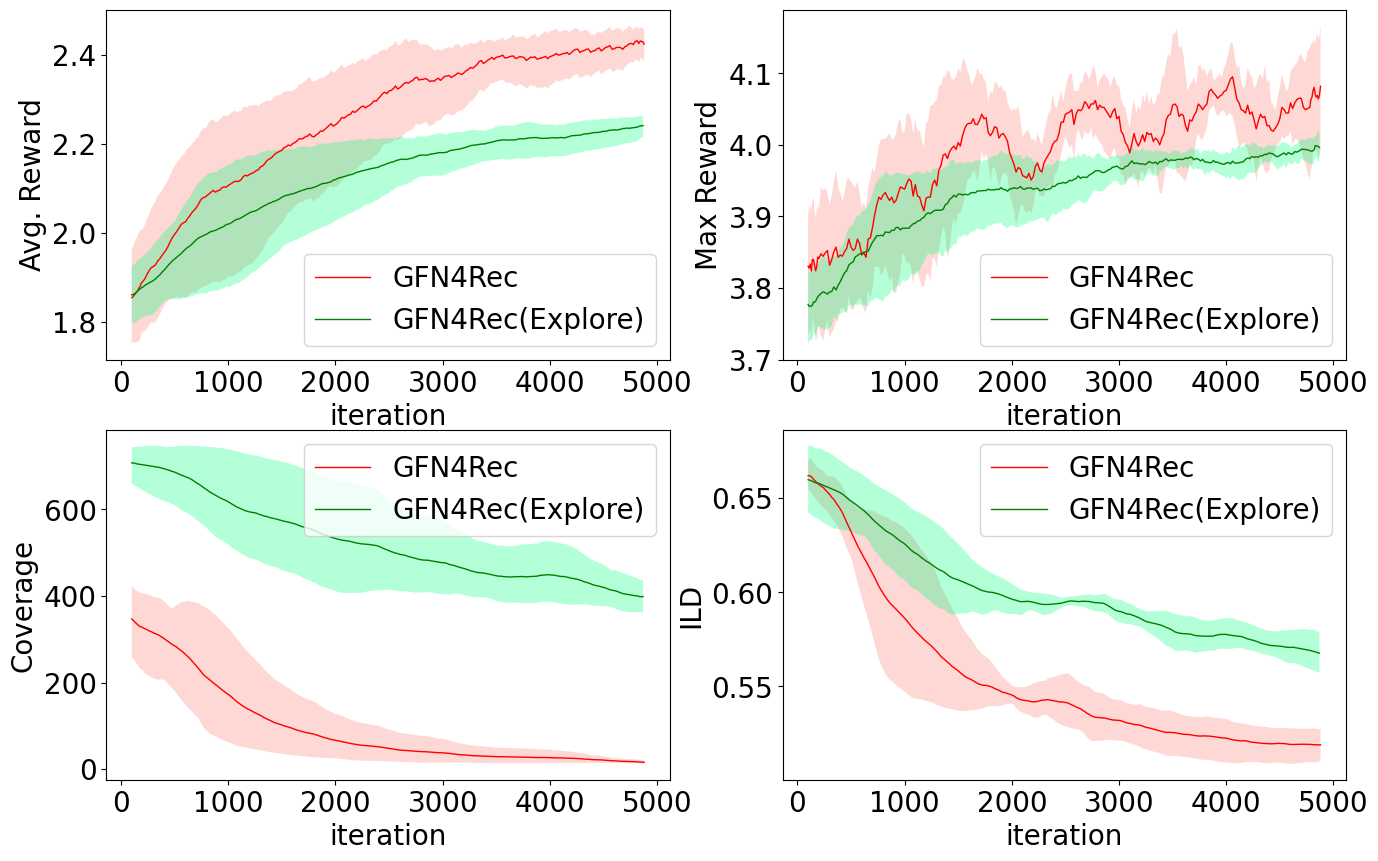

In [10]:



%matplotlib inline
from plot_utils import get_online_training_info, plot_mean_var_line, smooth
import numpy as np

smoothness = 20

model_list = {'GFN4Rec': 
                  {'path': "BaseOnlineAgent_SlateGFN_TB_R0.1_F1.0_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'TB_loss'],
                   'suffix': '/model_test.report'},
              'GFN4Rec(Explore)': 
                  {'path': "BaseOnlineAgent_SlateGFN_TB_R0.1_F1.0_Z1.0_actor0.0001_niter5000_reg0_ep0.05_bs128_epbs128_seed",
                   'loss': ['loss', 'TB_loss'],
                   'suffix': '/model.report'}
             }


# observe_metric = {'episode': 'iteration',
#                   'avg_reward': 'Avg. Reward', 
#                   'max_reward': 'Max Reward',
#                   'coverage': 'Coverage', 
#                   'intra_slate_diversity': 'ILD',
#                   'is_click_rate': 'Click Rate', 
#                   'long_view_rate': 'View Rate',
#                   'is_like_rate': 'Like Rate', 
#                   'is_comment_rate': 'Comment Rate',
#                   'is_forward_rate': 'Forward Rate',
#                   'is_follow_rate': 'Follow Rate',
#                   'is_hate_rate': 'Hate Rate',}

# model_list = {'GFN_TB': 
#                   {'path': "BaseOnlineAgent_SlateGFN_TB_R0.3_F1.0_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
#                    'loss': ['loss', 'TB_loss'],
#                    'suffix': '/model_test.report'},
#               'GFN_TB(Explore)': 
#                   {'path': "BaseOnlineAgent_SlateGFN_TB_R0.3_F1.0_Z1.5_actor0.0003_niter5000_reg0_ep0.05_bs128_epbs128_seed",
#                    'loss': ['loss', 'TB_loss'],
#                    'suffix': '/model.report'}
#              }


observe_metric = {'episode': 'iteration',
                  'avg_reward': 'Avg. Reward', 
                  'max_reward': 'Max Reward',
                  'coverage': 'Coverage', 
                  'intra_slate_diversity': 'ILD',
                  'is_click_rate': 'Click Rate', 
                  'is_like_rate': 'Like Rate',
                  'is_star_rate': 'Star Rate'}

observe_metric = {'episode': 'iteration',
                  'avg_reward': 'Avg. Reward', 
                  'max_reward': 'Max Reward',
                  'coverage': 'Coverage', 
                  'intra_slate_diversity': 'ILD'}

all_model_stats = []
for model_key in model_list:
    model_stats = []
    for seed in [11,13,17,19,23]:
        print(f"model({model_key}),seed({seed})")
        expe = model_list[model_key]['path'] + str(seed)
#         log_path = "output/ml1m/agent/" + expe + model_list[model_key]['suffix']
        log_path = "output/kuairand_1k/log_GFN/" + expe + model_list[model_key]['suffix']
        info = get_online_training_info(log_path, training_losses = ['loss'])
        for k in list(info.keys()):
            v = info[k]
            info[k] = smooth(np.array(v), smoothness)
        print(info.keys())
        model_stats.append({v: info[k] for k,v in observe_metric.items()})
        print('\t'.join([k for k,v in info.items()]))
        print('\t'.join([str(v[-1]) for k,v in info.items()]))
    all_model_stats.append(model_stats)
plot_mean_var_line(list(model_list.keys()), all_model_stats, "iteration",  ncol = 2, 
                   row_height = 5, window = None, save_path = "KR1K_TBvsTBExplore.svg", font_size = 20)

